In [1]:
# currently this works in py37-geo (cartopy issue in others)
import glob2
import pandas as pd
import geopandas as gpd
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [110]:
# view snow classification raster (dataset: Liston 2021, paper: Sturm and Liston, 2021)
raster = Path('/Users/mamason6/Documents/snowex/hackweek/snow-classes/SnowClass_NA_300m_10.0arcsec_2021_v01.0.nc')
# some what manual csv (used avg_coords for 2020 and added major 2021 sites (MT, COCP, IDBRBL, IDBRBT) and summed the pits from a 2020 and 2021 column. 
filename = Path('/Users/mamason6/Documents/snowex/core-datasets/reference/layers/SNEX_TS_SP_avg_prelim.csv')

# quick note about methods to extract raster data to shapefile/csv
# in qgis, under raster analysis toolbox, select Sample Raster Values

In [3]:
df = pd.read_csv(filename)
df.sort_values(by=['Snow Class'], inplace=True)
df.head()

,id,State,Location,Site,PitID,Latitude,Longitude,Easting,Northing,Zone,Pit Count,Snow Class
36,36,CO,Senator Beck,Senator Beck,COSBSB,37.90705,-107.72626,260318.0,4199007.0,13.0,5,1
35,35,CO,Niwot Ridge,Saddle,CONWSA,40.05497,-105.59065,449623.0,4434025.0,13.0,7,1
26,26,CO,Grand Mesa,Mesa West Open,COGMWO,39.03399,-108.21390,741158.0,4324243.0,12.0,10,2
17,17,CO,East River,Open 6,COERO6,38.92669,-106.97988,328375.0,4310505.0,13.0,9,2
16,16,CO,East River,Open 4,COERO4,38.92627,-106.97907,328444.0,4310457.0,13.0,12,2


In [100]:
snocla_dict = {1: ["Tundra", "2", "darkviolet"],
               2: ["Boreal Forest", "18", "dodgerblue"],
               3: ["Maritime", "3", "red"],
               4: ["Ephemeral", "0", "gold"],
               5: ["Prairie", "7", "darkorange"],
               6: ["Montane Forest", "24", "limegreen"],
               7: ["Ice", "0", "gray"]
}

# sum how many pits are part of each class
df.groupby("Snow Class").sum()['Pit Count']
# count how many site are part of each class
df.groupby("Snow Class").count()['Site'] # entered result in dictionary above

Snow Class
1     2
2    18
3     2
5     7
6    24
Name: Site, dtype: int64

/Users/mamason6/opt/miniconda3/envs/py37-geo/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6


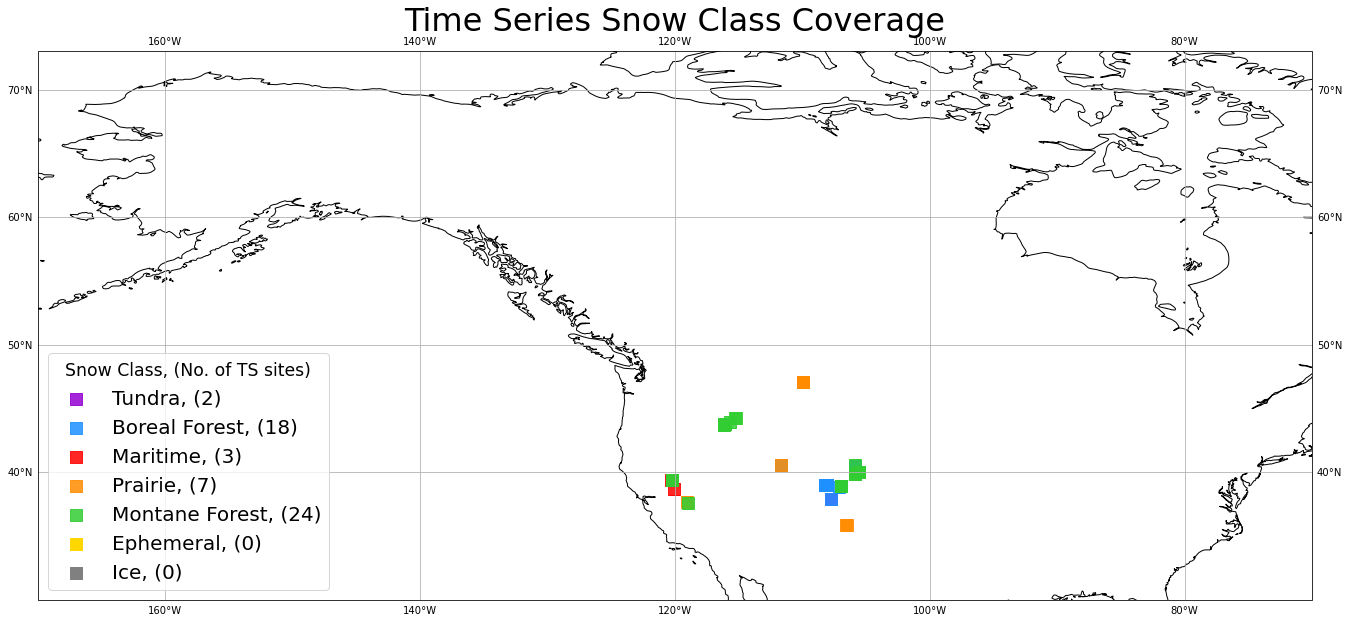

In [127]:
#This projection 
central_lat = 39
central_lon = -112
extent = [-170, -70, 30, 65]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

# set up fig
plt.figure(figsize=(18, 18))

# set up map
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines()
gl = ax.gridlines(draw_labels=True)

# add data
for i, row in df.iterrows():
    color = snocla_dict[row['Snow Class']][2]
    label = snocla_dict[row['Snow Class']][0] + ', ' +'('+snocla_dict[row['Snow Class']][1]+')'
    
    plt.scatter(row['Longitude'], y=row['Latitude'], marker='s', c=color, s=125, alpha=0.85, label=label)

plt.scatter([], [], marker='s', c= "gold", s=125, label="Ephemeral, (0)")
plt.scatter([], [], marker='s', c="gray", s=125, label= "Ice, (0)")

plt.plot
            
plt.title('Time Series Snow Class Coverage', fontsize=32)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
lg = plt.legend(by_label.values(), 
           by_label.keys(), 
           title="Snow Class, (No. of TS sites)",
           prop={'size': 20}, 
           loc='lower left')
title=lg.get_title()
title.set_fontsize('xx-large')

plt.tight_layout()

plt.savefig('/Users/mamason6/Documents/snowex/core-datasets/reference/figures/SnowClassCoverage.png', dpi=300, bbox='tight', facecolor='white', transparent=False)
plt.show()

In [35]:
colors = [x[2] for x in snocla_dict.values()]
colors

['darkviolet',
 'dodgerblue',
 'red',
 'goldenrod',
 'darkorange',
 'limegreen',
 'lightgray']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


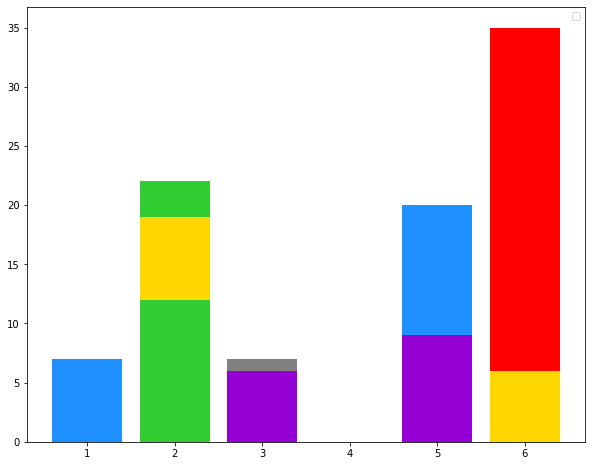

In [108]:
# set up fig
plt.figure(figsize=(10, 8))

colors = [x[2] for x in snocla_dict.values()]
label = [x[0] for x in snocla_dict.values()]


for i, row in df.iterrows():
    color = snocla_dict[row['Snow Class']][2]
    label = snocla_dict[row['Snow Class']][0]

    plt.bar(x=df['Snow Class'], height=df['Pit Count'], color=colors)
plt.legend()



In [ ]:
# open data set
ds = xr.open_dataset(raster)
ds.dims


In [ ]:
# reverse latitude (so it plots right side up)
ds = ds.reindex(lat=ds.lat[::-1]) # this works too: ds=np.flip(ds.SnowClass, 0); ds=ds.to_dataset()

In [ ]:
ds = ds.sel(lat=slice(49, 33), lon=slice(-125, -102))
ds.dims

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(ds.SnowClass, cmap='Set1')
plt.colorbar()
plt.clim(1,8)

The snow classes are: 
* 1 = Tundra
* 2 = Boreal Forest
* 3 = Maritime
* 4 = Ephemeral
* 5 = Prairie
* 6 = Montane Forest

Non-snow classes:
* 7 = Ice (glaciers and ice sheets)
* 8 = Ocean

In [ ]:
ds

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(states)